# Geometry

### Vector
Kino offers methods and classes to intuitively deal with geometric entities such as 2D vectors.
The `Vector` class can be used to represent 2D vectors in an intuitive and convenient way while `kino.geometry.vector_utils` collects utility code to do operations on vectors (like taking the average of multiple vectors)

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt


from kino.geometry import Vector


The angle between the two vectors is: 90.00


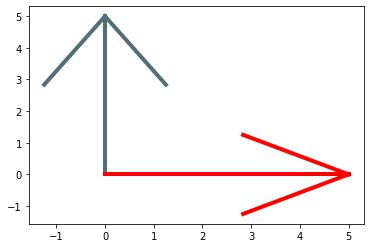

In [2]:
# define and draw a vector
vec = Vector(
    0,  # X coordinate
    5,  # Y coordinate
)


# define a second vector
vec2 = Vector(5, 0)
print(f'The angle between the two vectors is: {vec.angle_with(vec2):.2f}')

vec.draw()
vec2.draw(color='red')


    x: 0
    y: 5
    angle: 90.00
    length: 5.00

    v1 dot v2:  0.00



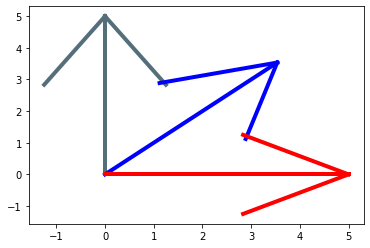

In [3]:
# Vector implements many useful methods:
print(f"""
    x: {vec.x}
    y: {vec.y}
    angle: {vec.angle2:.2f}
    length: {vec.magnitude:.2f}

    v1 dot v2:  {vec.dot(vec2):.2f}
""")

# you can also rotate vectors by an angle
rotated = vec2.rotate(45)
vec.draw()
rotated.draw(color='blue')
vec2.draw(color='red')

The `Vector` class also works when dealing with series of 2D vector (e.g. a 2D vector with an animal's velocity at each frame).
In that case the vector is defined by two sets of coordinates ${x_1, x_2, ..., x_T}$ and ${y_1, y_2, ..., y_T}$

In [4]:
vec = Vector([1, .5, 0], [0, .5, 1])

print(vec)

# The same methods work for lists of vectors:
print('Angle at each frame: ', vec.angle)

Array of 3 vectors.
Angle at each frame:  [ 0. 45. 90.]


## Trajectory

A key object in `kino` is the `Trajectory` class. It's defined by a set of $x$ and $y$ coordinates outlining the 2D trajectory of a body part (position of a body part in the XY plane at each frame, based on tracking data).

The trajectory class computes several **kinematics** variables such as the direction of the tangent and normal vectors to the trajectory at each frame, velocity and acceleartion vectors as well as angular velocity (rate of change of the angle of the tangent vector). These are generally smoothed by binning each quantity over N consecutive frames and taking the average for each bin.

The angle of the tangent vector is denoted by `theta`, while the angular velocity and acceleration are called `thetadot` and `thetadotdot` ($\dot \theta$, $\ddot \theta$).

Note: vector quantities such as the velocity vector are stored as instances of the `Vector` class!

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from kino.geometry import Trajectory
from kino.draw.gliphs import Arrows

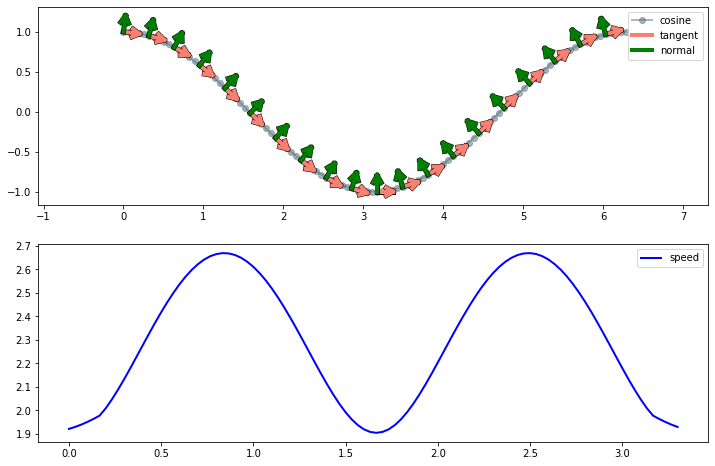

In [6]:
# define X and Y coordinates
x = np.linspace(0, 2*np.pi, 100)
y = np.cos(x)

trajectory = Trajectory(x, y, name='cosine', fps=30)

# plot the trajectory
f, axes = plt.subplots(figsize=(12, 8), nrows=2)

axes[0].plot(
    trajectory.x,
    trajectory.y,
    '-o',
    color=trajectory.color,
    lw=2,
    label=trajectory.name,
    alpha=.5, 
)

# mark the tangent and normal vectors 
Arrows(
    trajectory.x,
    trajectory.y,
    trajectory.tangent.angle,
    L=.2,
    color='salmon',
    label='tangent',
    step=5,
    outline=True,
    ax=axes[0],
)

Arrows(
    trajectory.x,
    trajectory.y,
    trajectory.normal.angle,
    L=.2,
    color='green',
    label='normal',
    step=5, 
    outline=True,
    ax=axes[0],
)

# plot speed trace
axes[1].plot(
    trajectory.time, trajectory.speed, lw=2, color='blue', label='speed'
)


axes[0].axis('equal')
_ = axes[0].legend()
_ = axes[1].legend()

## AnchoredTrajectory

The `AnchoredTrajectory` class combines `Vector` and `Tangent` to represent an instance where a 2D vector is defined for each point along a 2D trajectory. `Bones` connecting two bodyparts are naturally defined as vectors going from one body part to the other, they are then 2D vectors starting at a set of XY coordinates (the position of the body part)


In [7]:
from kino.geometry import AnchoredTrajectory

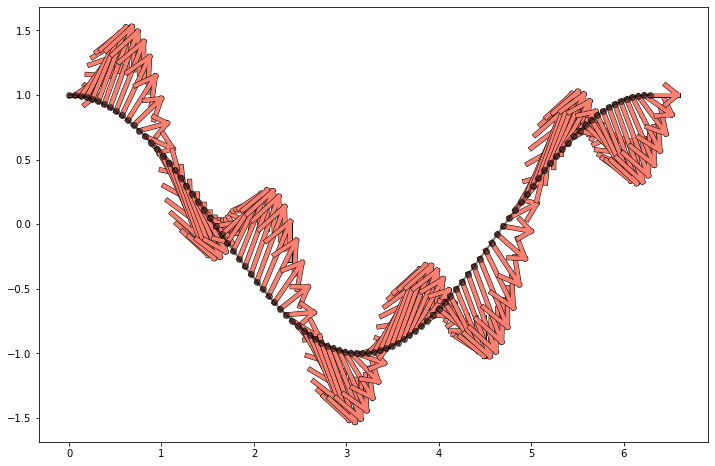

In [8]:
# define X and Y coordinates and a 2D vector
x = np.linspace(0, 2*np.pi, 100)
y = np.cos(x)

vec = Vector(np.ones_like(x), 2 * np.sin(4 * x))

anchored_trajectory = AnchoredTrajectory(x, y, vec, color='black', name='my_traj')

# draw the anchored trajectory
f, ax = plt.subplots(figsize=(12, 8))

ax.plot(
    anchored_trajectory.x,
    anchored_trajectory.y,
    '-o',
    color=anchored_trajectory.color,
    lw=2,
    label=anchored_trajectory.name,
    alpha=.5, 
)

# mark the vector
_ = Arrows(
    anchored_trajectory.x,
    anchored_trajectory.y,
    anchored_trajectory.vector.angle,
    L=anchored_trajectory.vector.magnitude * .3,
    color='salmon',
    outline=True,
    zorder=-1,
)


The `Trajectory` and `AnchoredTrajectory` classes can be used to store the trajectory of a bodypart and skeleton bone, respectively, as the animals moves. A collection of such objects (e.g. one per tracked body part) then efficiently stores all information about the animal kinematics.